In [13]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("ordini.csv")
df.head()

,OrdineID,Data,Cliente,Prodotto,Quantità,Prezzo_unitario,Spedito
0,1001,2024-06-01,Mario Rossi,Laptop,1,800.0,True
1,1002,2024-06-01,Giulia Bianchi,Mouse,2,15.5,True
2,1003,2024-06-02,Luigi Verdi,Monitor,1,200.0,False
3,1004,2024-06-03,Mario Rossi,Mouse,1,15.5,True
4,1005,2024-06-03,Anna Neri,Laptop,2,790.0,True


In [2]:
df["Totale"] = df["Prezzo_unitario"] * df["Quantità"]
df.head()


,OrdineID,Data,Cliente,Prodotto,Quantità,Prezzo_unitario,Spedito,Totale
0,1001,2024-06-01,Mario Rossi,Laptop,1,800.0,True,800.0
1,1002,2024-06-01,Giulia Bianchi,Mouse,2,15.5,True,31.0
2,1003,2024-06-02,Luigi Verdi,Monitor,1,200.0,False,200.0
3,1004,2024-06-03,Mario Rossi,Mouse,1,15.5,True,15.5
4,1005,2024-06-03,Anna Neri,Laptop,2,790.0,True,1580.0


In [3]:
lista_non_spediti = []

for i, ordine in df.iterrows():
    
    if not ordine["Spedito"]:
        lista_non_spediti.append((ordine["OrdineID"], ordine["Data"], ordine["Cliente"], ordine["Prodotto"], ordine["Totale"]))

print(lista_non_spediti)

[(1003, '2024-06-02', 'Luigi Verdi', 'Monitor', 200.0), (1006, '2024-06-03', 'Giulia Bianchi', 'Monitor', 195.0)]


In [4]:
fatturato_clienti = df.groupby("Cliente")["Totale"].sum().sort_values(ascending=False)

print(fatturato_clienti)

Cliente
Anna Neri         1622.0
Mario Rossi        815.5
Giulia Bianchi     226.0
Luigi Verdi        200.0
Name: Totale, dtype: float64


In [5]:
prodotto_piu_venduto = df.groupby("Prodotto")["Quantità"].sum().idxmax()

print(f"Il prodotto più venduto è: {prodotto_piu_venduto}")

Il prodotto più venduto è: Mouse


In [5]:
fatturato_giornaliero = df.groupby("Data")["Totale"].sum().reset_index()
print(fatturato_giornaliero)

         Data  Totale
0  2024-06-01   831.0
1  2024-06-02   200.0
2  2024-06-03  1790.5
3  2024-06-04    42.0


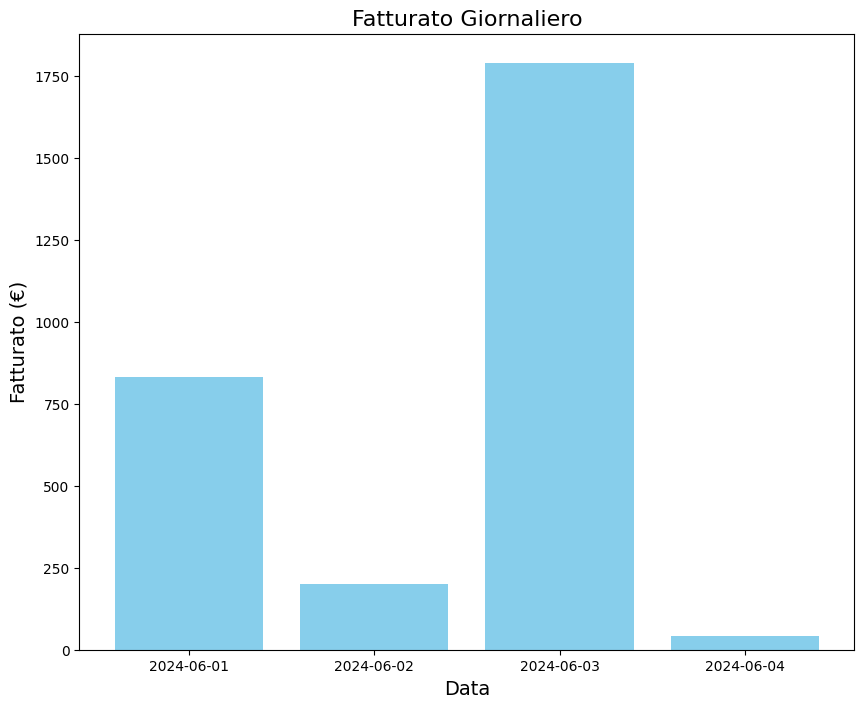

In [24]:
plt.figure(figsize=(10, 8))
plt.bar(fatturato_giornaliero["Data"], fatturato_giornaliero["Totale"], color='skyblue')
plt.title("Fatturato Giornaliero", fontsize=16)
plt.xlabel("Data", fontsize=14)
plt.ylabel("Fatturato (€)", fontsize=14)
plt.tight_layout
plt.show()